In [1]:
import os
import pickle
import json

import pandas as pd
import numpy as np

from dslab_virgo_tsi.base import FitResult, FinalResult, OutResult, BaseSignals
from dslab_virgo_tsi.constants import Constants as Const
from dslab_virgo_tsi.visualizer import Visualizer

In [2]:
visualizer = Visualizer()
visualizer.set_figsize((16, 7))

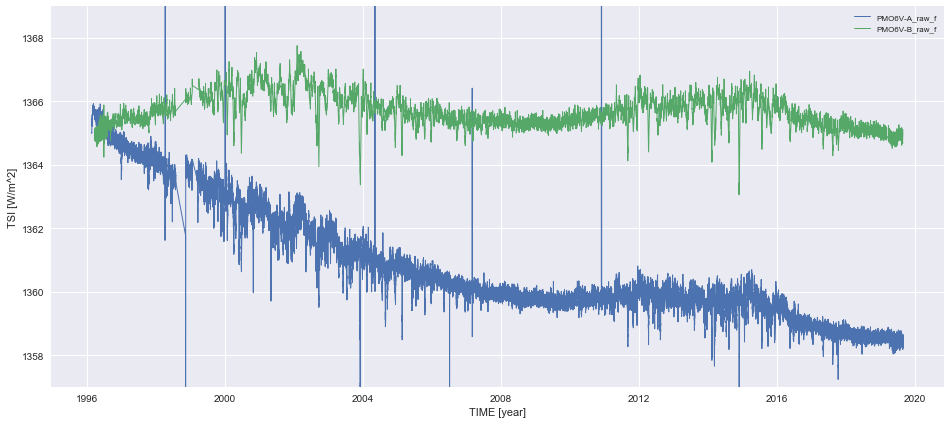

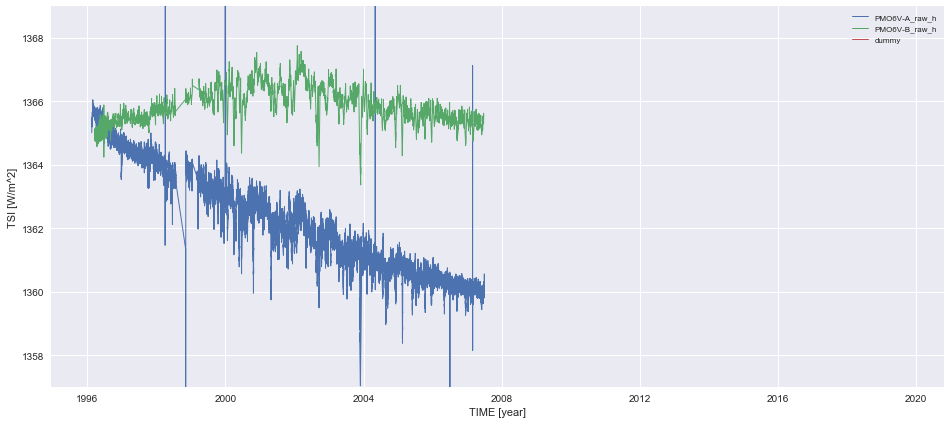

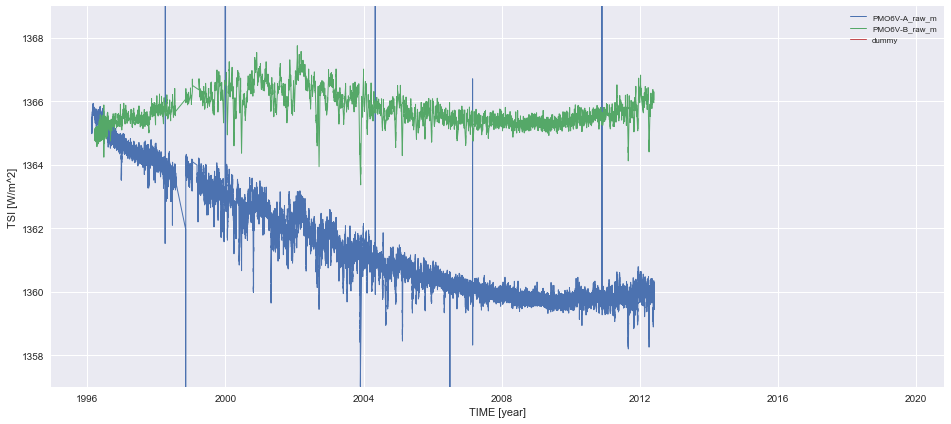

In [5]:
# HALF DATASET
results_dir = "./results/2020-04-17_00-49-55_smooth_monotonic_svgp"
with open(os.path.join(results_dir, "SMOOTH_MONOTONIC_modeling_result.pkl"), "rb") as f:
    result_h = pickle.load(f)
    
# MEDIUM DATASET
results_dir = "./results/2020-04-17_11-38-15_smooth_monotonic_svgp"
with open(os.path.join(results_dir, "SMOOTH_MONOTONIC_modeling_result.pkl"), "rb") as f:
    result_m = pickle.load(f)
    
# FULL DATASET
results_dir = "./results/results/2019-12-17_01-47-09_smooth_monotonic_svgp_FINAL_m1000"
with open(os.path.join(results_dir, "SMOOTH_MONOTONIC_modeling_result.pkl"), "rb") as f:
    result_f = pickle.load(f)
    
# Input data
base_sig_f = result_f.base_signals
base_sig_h = result_h.base_signals
base_sig_m = result_m.base_signals

x_dummy = np.empty_like(base_sig_f.b_nn)
x_dummy[:] = np.nan
x_dummy[-1] = base_sig_f.b_nn[-1]
t_dummy = base_sig_f.t_b_nn

visualizer.plot_signals(
    [
        (base_sig_f.t_a_nn, base_sig_f.a_nn, f"{Const.A}_raw_f", False),
        (base_sig_f.t_b_nn, base_sig_f.b_nn, f"{Const.B}_raw_f", False),
    ],
results_dir=None, title=None, x_ticker=Const.XTICKER, y_lim=[1357, 1369], legend="upper right", 
x_label=Const.YEAR_UNIT, y_label=Const.TSI_UNIT)

visualizer.plot_signals(
    [
        (base_sig_h.t_a_nn, base_sig_h.a_nn, f"{Const.A}_raw_h", False),
        (base_sig_h.t_b_nn, base_sig_h.b_nn, f"{Const.B}_raw_h", False),
        (t_dummy, x_dummy, f"dummy", False),
    ],
results_dir=None, title=None, x_ticker=Const.XTICKER, y_lim=[1357, 1369], legend="upper right", 
x_label=Const.YEAR_UNIT, y_label=Const.TSI_UNIT)

visualizer.plot_signals(
    [
        (base_sig_m.t_a_nn, base_sig_m.a_nn, f"{Const.A}_raw_m", False),
        (base_sig_m.t_b_nn, base_sig_m.b_nn, f"{Const.B}_raw_m", False),
        (t_dummy, x_dummy, f"dummy", False),
    ],
results_dir=None, title=None, x_ticker=Const.XTICKER, y_lim=[1357, 1369], legend="upper right", 
x_label=Const.YEAR_UNIT, y_label=Const.TSI_UNIT)

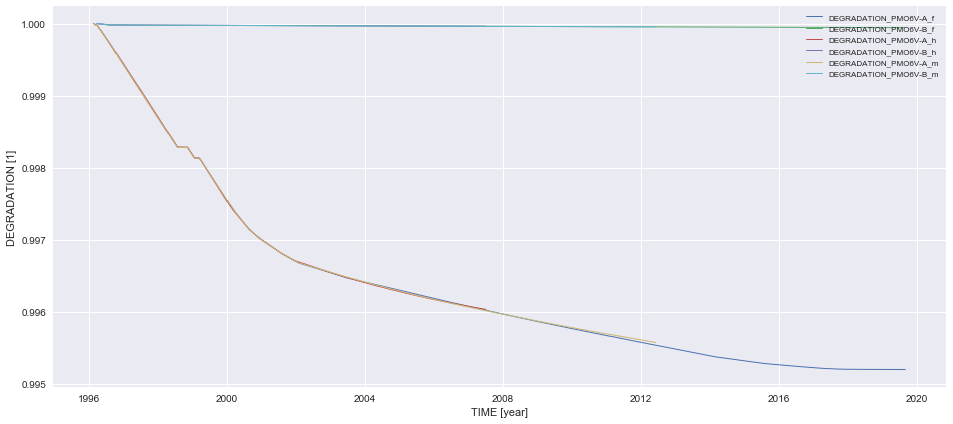

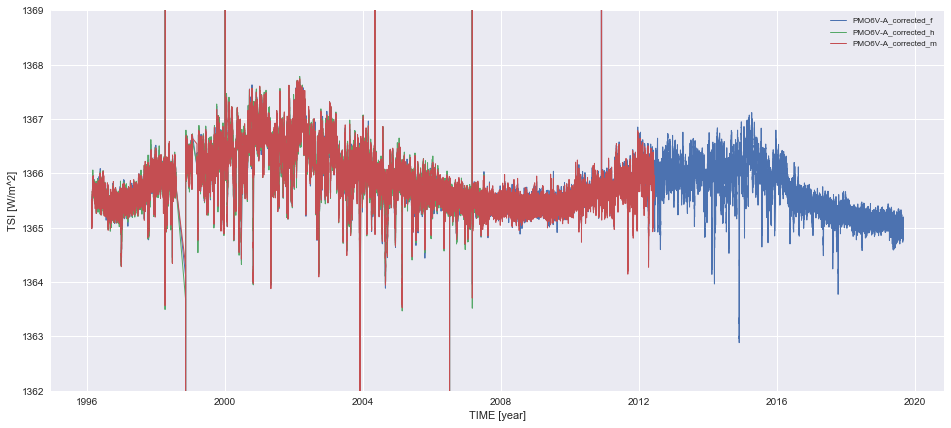

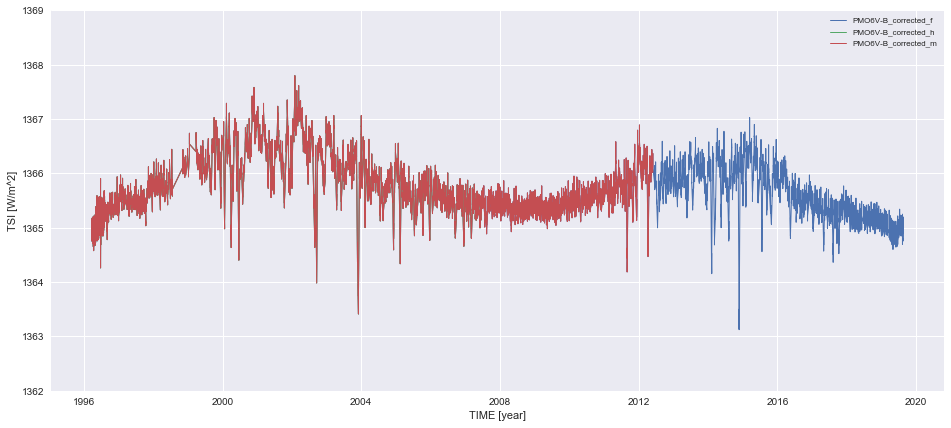

In [6]:
final_res_f = result_f.final
final_res_h = result_h.final
final_res_m = result_m.final

visualizer.plot_signals(
    [
        (base_sig_f.t_a_nn, final_res_f.degradation_a_nn, f"DEGRADATION_{Const.A}_f", False),
        (base_sig_f.t_b_nn, final_res_f.degradation_b_nn, f"DEGRADATION_{Const.B}_f", False),
        (base_sig_h.t_a_nn, final_res_h.degradation_a_nn, f"DEGRADATION_{Const.A}_h", False),
        (base_sig_h.t_b_nn, final_res_h.degradation_b_nn, f"DEGRADATION_{Const.B}_h", False),
        (base_sig_m.t_a_nn, final_res_m.degradation_a_nn, f"DEGRADATION_{Const.A}_m", False),
        (base_sig_m.t_b_nn, final_res_m.degradation_b_nn, f"DEGRADATION_{Const.B}_m", False),
    ],
results_dir=None, title=None, x_ticker=Const.XTICKER, legend="upper right",
x_label=Const.YEAR_UNIT, y_label=Const.DEGRADATION_UNIT)

# Corrected A
visualizer.plot_signals(
    [
        (base_sig_f.t_a_nn, final_res_f.a_nn_corrected, f"{Const.A}_corrected_f", False),
        (base_sig_h.t_a_nn, final_res_h.a_nn_corrected, f"{Const.A}_corrected_h", False),
        (base_sig_m.t_a_nn, final_res_m.a_nn_corrected, f"{Const.A}_corrected_m", False),
    ],
results_dir=None, title=None, x_ticker=Const.XTICKER, legend="upper right",
x_label=Const.YEAR_UNIT, y_label=Const.TSI_UNIT, y_lim=[1362, 1369])

# Corrected B
visualizer.plot_signals(
    [
        (base_sig_f.t_b_nn, final_res_f.b_nn_corrected, f"{Const.B}_corrected_f", False),
        (base_sig_h.t_b_nn, final_res_h.b_nn_corrected, f"{Const.B}_corrected_h", False),
        (base_sig_m.t_b_nn, final_res_m.b_nn_corrected, f"{Const.B}_corrected_m", False),
    ],
results_dir=None, title=None, x_ticker=Const.XTICKER, legend="upper right",
x_label=Const.YEAR_UNIT, y_label=Const.TSI_UNIT, y_lim=[1362, 1369])

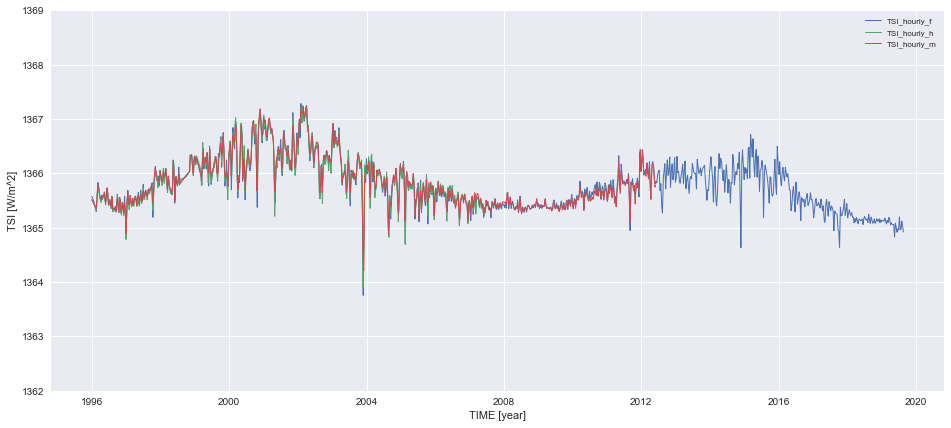

In [7]:
out_res_f = result_f.out
out_res_h = result_h.out
out_res_m = result_m.out

visualizer.plot_signals(
    [
        (out_res_f.t_hourly_out, out_res_f.signal_hourly_out, f"TSI_hourly_f", False),
        (out_res_h.t_hourly_out, out_res_h.signal_hourly_out, f"TSI_hourly_h", False),
        (out_res_m.t_hourly_out, out_res_m.signal_hourly_out, f"TSI_hourly_m", False),
    ],
results_dir=None, title=None, x_ticker=Const.XTICKER, legend="upper right",
x_label=Const.YEAR_UNIT, y_label=Const.TSI_UNIT, y_lim=[1362, 1369])

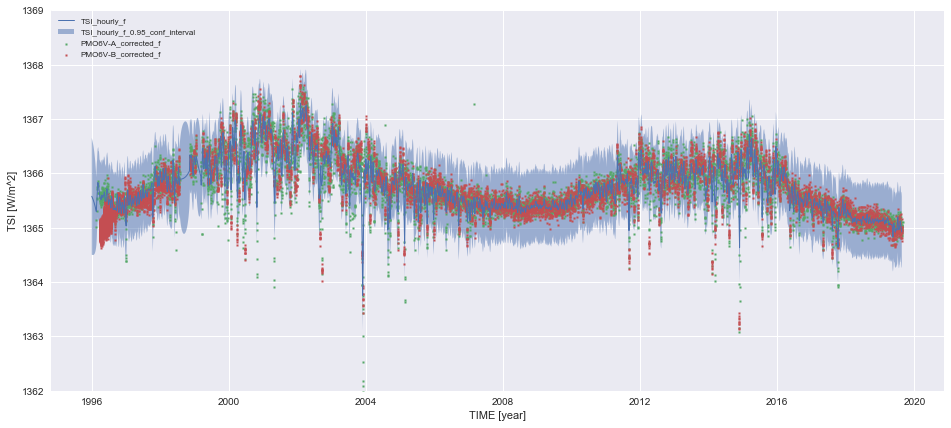

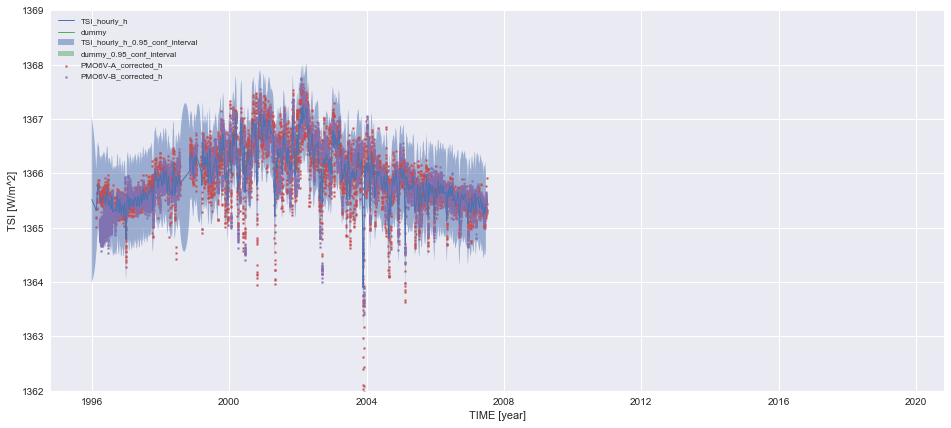

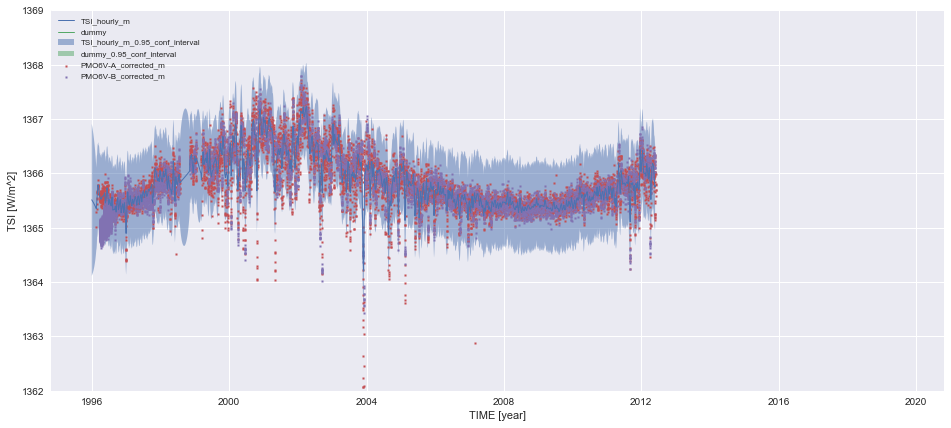

In [8]:
visualizer.plot_signals_mean_std_precompute(
    [
        (out_res_f.t_hourly_out, out_res_f.signal_hourly_out, out_res_f.signal_std_hourly_out, f"TSI_hourly_f")
    ],
results_dir=None, title=None, x_ticker=Const.XTICKER, legend="upper left",
y_lim=[1362, 1369],
data_points_triplets=[
    (base_sig_f.t_a_nn, final_res_f.a_nn_corrected, f"{Const.A}_corrected_f"),
    (base_sig_f.t_b_nn, final_res_f.b_nn_corrected, f"{Const.B}_corrected_f")
],
x_label=Const.YEAR_UNIT, y_label=Const.TSI_UNIT, max_points=1e5)

visualizer.plot_signals_mean_std_precompute(
    [
        (out_res_h.t_hourly_out, out_res_h.signal_hourly_out, out_res_h.signal_std_hourly_out, f"TSI_hourly_h"),
        (t_dummy, x_dummy, x_dummy, f"dummy")
    ],
results_dir=None, title=None, x_ticker=Const.XTICKER, legend="upper left", y_lim=[1362, 1369],
data_points_triplets=[
    (base_sig_h.t_a_nn, final_res_h.a_nn_corrected, f"{Const.A}_corrected_h"),
    (base_sig_h.t_b_nn, final_res_h.b_nn_corrected, f"{Const.B}_corrected_h"),
],
x_label=Const.YEAR_UNIT, y_label=Const.TSI_UNIT, max_points=1e5)

visualizer.plot_signals_mean_std_precompute(
    [
        (out_res_m.t_hourly_out, out_res_m.signal_hourly_out, out_res_m.signal_std_hourly_out, f"TSI_hourly_m"),
        (t_dummy, x_dummy, x_dummy, f"dummy")
    ],
results_dir=None, title=None, x_ticker=Const.XTICKER, legend="upper left", y_lim=[1362, 1369],
data_points_triplets=[
    (base_sig_m.t_a_nn, final_res_m.a_nn_corrected, f"{Const.A}_corrected_m"),
    (base_sig_m.t_b_nn, final_res_m.b_nn_corrected, f"{Const.B}_corrected_m"),
],
x_label=Const.YEAR_UNIT, y_label=Const.TSI_UNIT, max_points=1e5)